In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 10)

In [53]:
x = pd.read_csv('data/x_train.csv.gz', delimiter=';')
y = pd.read_csv('data/y_train.csv.gz', names=['target'])
test = pd.read_csv('data/x_test.csv.gz', delimiter=';')

In [91]:
y.target.sum() / y.shape[0]

0.28818854047214204

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [174]:
clf = SGDClassifier(random_state=42)

In [171]:
%%time
scores = cross_val_score(clf, x_scaled, np.ravel(y), cv=5, scoring='roc_auc')
print("AUC: {} (+/- {})".format(scores.mean(), scores.std() * 2))

AUC: 0.8586387393867305 (+/- 0.03424434468207522)
CPU times: user 114 ms, sys: 7.13 ms, total: 121 ms
Wall time: 126 ms


In [221]:
scores = cross_val_score(clf, x_scaled, np.ravel(y), cv=5, scoring='neg_mean_absolute_error')
print("MAE: {} (+/- {})".format(scores.mean(), scores.std() * 2))

Accuracy: -0.17758706428607815 (+/- 0.010097185755094882)


In [173]:
clf.fit(x_scaled, np.ravel(y))
clf.coef_

array([[ 0.08460598,  0.3855762 ,  0.03390589,  0.71336554,  0.36501403,
        -0.11447037, -0.46168484, -0.38190878, -0.45833908, -0.58605551,
         0.43540129,  1.32652476]])

In [107]:
def scatter(actual, predicted, T):
    plt.scatter(actual, predicted)
    plt.xlabel("Labels")
    plt.ylabel("Predicted probabilities")
    plt.plot([-0.2, 1.2], [T, T])
    plt.axis([-0.1, 1.1, -0.1, 1.1])

In [177]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, np.ravel(y))

In [188]:
clf = SGDClassifier(random_state=42, loss='log')
clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [220]:
pred = clf.predict_proba(x_test)[:,1]
pred

array([ 0.38135961,  0.54732968,  0.4077061 , ...,  0.11774783,
        0.06723326,  0.99553201])

In [225]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred) * 100

24.697651407977254

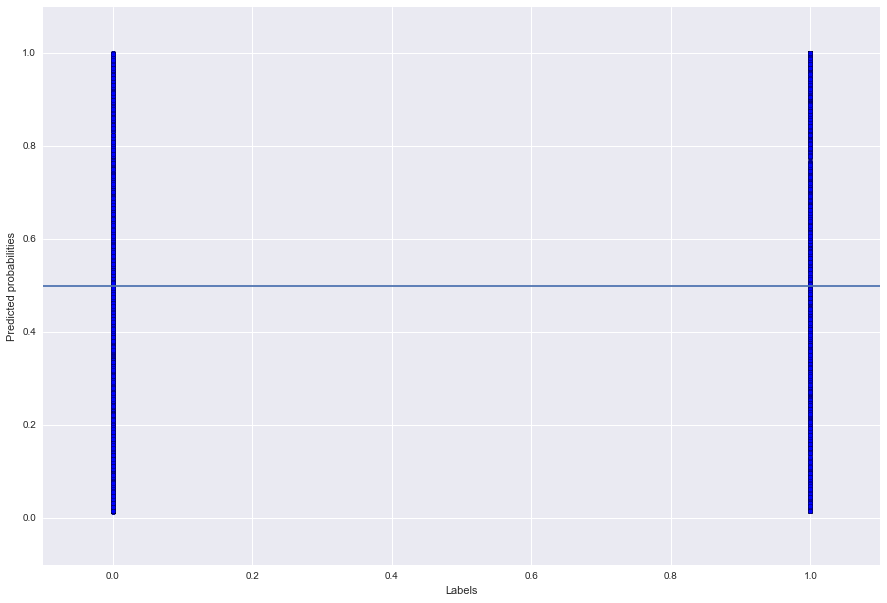

In [190]:
scatter(y_test, pred, 0.5)

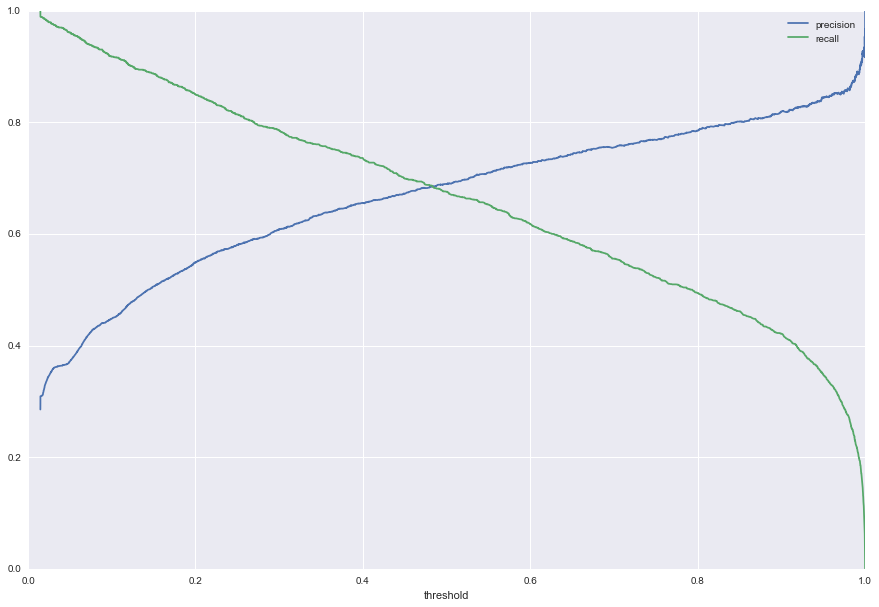

In [191]:
from sklearn.metrics import precision_recall_curve
prec, rec, thresh = precision_recall_curve(y_test, pred)

plt.plot(thresh, prec[:-1], label="precision")
plt.plot(thresh, rec[:-1], label="recall")
plt.xlabel("threshold")
plt.legend()

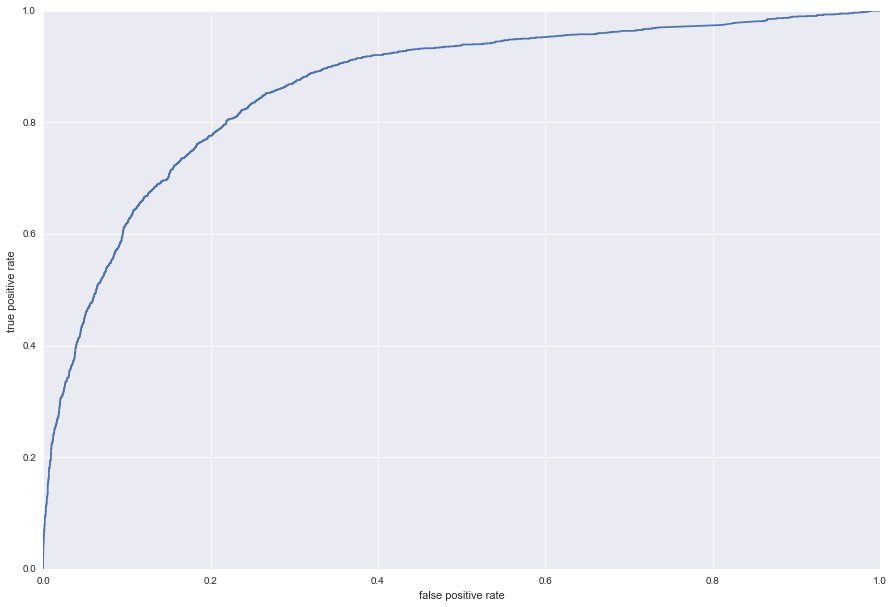

In [226]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

In [196]:
def get_distance(fpr, tpr):
    return ((fpr) ** 2 + (tpr - 1) ** 2) ** 0.5

def get_opt_thresh(actual, predicted):
    fprs, tprs, thrs = roc_curve(actual, predicted)

    fpr_opt = None
    tpr_opt = None
    distance_opt = None
    thr_opt = None
    for i in range(len(thrs)):
        dist = get_distance(fprs[i], tprs[i])
        if (distance_opt is None) or (dist < distance_opt):
            distance_opt = dist
            fpr_opt = fprs[i]
            tpr_opt = tprs[i]
            thr_opt = thrs[i]
    
    return thr_opt

In [197]:
get_opt_thresh(y_test, pred)

0.29786315299032667

In [199]:
clf = SGDClassifier(random_state=42, loss='log')
clf.fit(x_scaled, np.ravel(y))

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [201]:
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

In [216]:
pred_test = clf.predict_proba(test_scaled)[:,1]
pred_test

array([ 0.133338  ,  0.1054464 ,  0.67343309, ...,  0.06118314,
        0.1615945 ,  0.06085748])

In [217]:
pred_test_ = [1 if p > 0.297 else 0 for p in pred_test]

In [219]:
submission = pd.DataFrame()
submission['target'] = pred_test_
submission.to_csv("submission.csv", index=False, header=False)

На лидерборде `18,3220732`